In [21]:
from sklearn.datasets import load_iris
import pandas as pd

In [22]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
df = pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
df["sepal length"] = df[0]
df["sepal width"] = df[1]
df = df.drop([0,1,2,3] , axis=1)

In [27]:
df.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

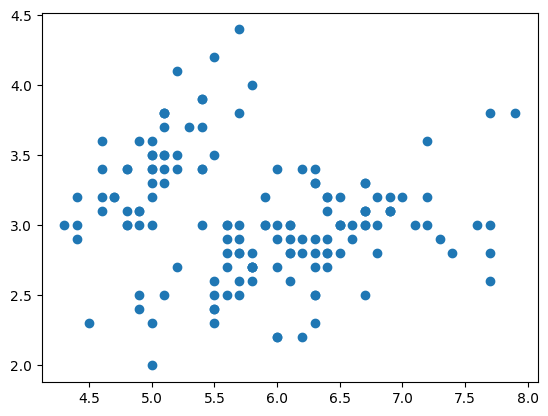

In [30]:
plt.scatter(df["sepal length"] , df["sepal width"])

In [33]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["sepal length","sepal width"]])
y_pred

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [34]:
df["clusters"] = y_pred
df.head()

,sepal length,sepal width,clusters
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2


Text(0, 0.5, 'sepal width')

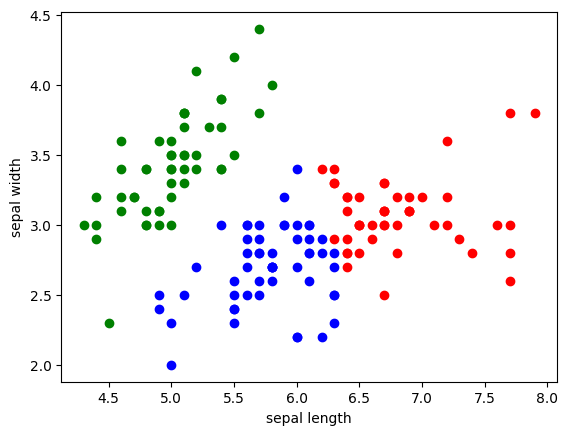

In [35]:
df1 = df[df["clusters"]==0]
df2 = df[df["clusters"]==1]
df3 = df[df["clusters"]==2]

plt.scatter(df1["sepal length"] , df1["sepal width"] , c='b')
plt.scatter(df2["sepal length"] , df2["sepal width"] , c="r")
plt.scatter(df3["sepal length"] , df3["sepal width"] , c="g")

plt.xlabel("sepal length")
plt.ylabel("sepal width")

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["sepal length"] = scaler.fit_transform(df[["sepal length"]])
df["sepal width"] = scaler.fit_transform(df[["sepal width"]])
df.head()

,sepal length,sepal width,clusters
0,0.222222,0.625000,2
1,0.166667,0.416667,2
2,0.111111,0.500000,2
3,0.083333,0.458333,2
4,0.194444,0.666667,2


In [38]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[["sepal length","sepal width"]])
y_pred

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [39]:
df["clusters"] = y_pred
df.head()

,sepal length,sepal width,clusters
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


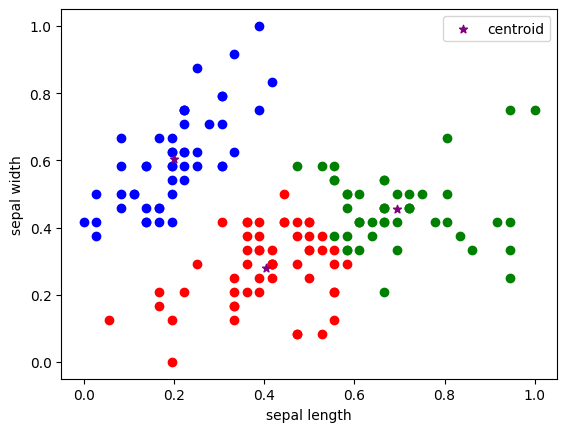

In [42]:
df1 = df[df["clusters"]==0]
df2 = df[df["clusters"]==1]
df3 = df[df["clusters"]==2]

plt.scatter(df1["sepal length"] , df1["sepal width"] , c='b')
plt.scatter(df2["sepal length"] , df2["sepal width"] , c="r")
plt.scatter(df3["sepal length"] , df3["sepal width"] , c="g")
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , label="centroid" , c='purple' , marker='*')

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

In [43]:
sse = []

for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit_predict(df[["sepal length","sepal length"]])
    sse.append(km.inertia_)

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/.local/lib/python3.

In [44]:
sse

[15.766718106995885,
 4.770755215444418,
 2.4318085892159966,
 1.2796834328925417,
 0.8590941619450387,
 0.5608960252189418,
 0.4063700819686366,
 0.3147331931125157,
 0.22935222255756013]

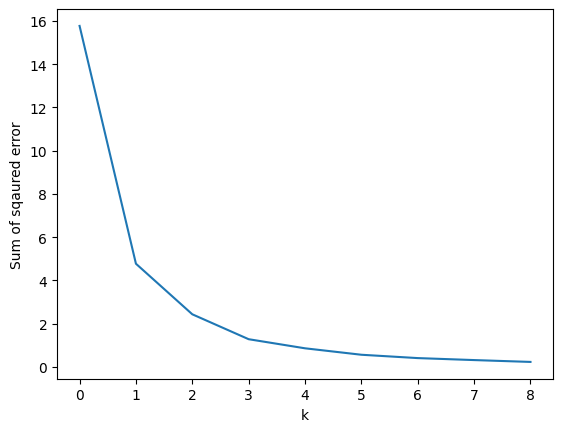

In [45]:
plt.xlabel('k')
plt.ylabel('Sum of sqaured error')
plt.plot(sse)